In [113]:
import matplotlib.pyplot as plt
import numpy as np

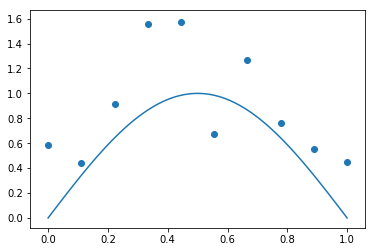

In [130]:
def getPoints(N): 
    pts=[]
    for i in range(N):
        pts.append(np.sin(np.pi*i/N)+np.random.normal()/3) ## scaled back the noise some
    return pts

np.random.seed(0) ## Good practice

x=np.linspace(0,1,100) ## Underlying data that is sampled
y=np.sin(np.pi*x)
y_pts = getPoints(10) ## Samples plus a gaussian error term
x_pts=np.linspace(0,1,10)
plt.scatter(x_pts,y_pts,marker='o')
plt.plot(x,y)
plt.show()

In [115]:
X = np.matrix([np.ones(len(x_pts)), x_pts]) ## Pad with a vector of ones for theta_0
y = np.matrix(y_pts)

the general form of X will be a vector for each $x^n$ in the hypothesis 

In [116]:
X=X.T
X.shape

(10, 2)

In [117]:
y=y.T
y.shape

(10, 1)

In [118]:
theta=np.matrix(np.zeros(2))
theta.shape

(1, 2)

In [119]:
X*theta.T-y

matrix([[-0.58801745],
        [-0.44240273],
        [-0.91403125],
        [-1.55598139],
        [-1.57357585],
        [-0.67424071],
        [-1.26775266],
        [-0.75856459],
        [-0.55337897],
        [-0.44588316]])

In [120]:
np.multiply(X*theta.T-y,X[:,1])

matrix([[-0.        ],
        [-0.04915586],
        [-0.20311805],
        [-0.51866046],
        [-0.69936704],
        [-0.37457817],
        [-0.84516844],
        [-0.58999468],
        [-0.49189242],
        [-0.44588316]])

In [121]:
np.sum(np.multiply(X*theta.T-y,X[:,1]))

-4.2178182890997444

Oh my gawd why did I not approach this with matrices from the get go!

In [122]:
def fitIt(x_pts,y_pts,terms,alpha,iters):
    myVecs=[]
    for i in range(terms):
        myVecs.append(np.power(x_pts,i))
    X = np.matrix(myVecs).T
    y = np.matrix(y_pts).T
    theta=np.matrix(np.zeros(terms))
    temp=np.matrix(np.zeros(terms))
    for i in range(iters):
        diff = X*theta.T-y
        for j in range(terms):
            temp.T[j]=np.sum(np.multiply(diff,X[:,j]))
        theta=theta-alpha*temp
    return theta

In [123]:
myTheta = fitIt(x_pts,y_pts,3,0.01,10000)
myTheta.tolist()[0][::-1] ## Well there's gotta be an easier way

[-3.2929269935543917, 3.1241600973416443, 0.4739675063087082]

In [126]:
myF = np.poly1d(myTheta.tolist()[0][::-1])
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
plt.plot(x,y)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (100,) and (10, 1)

In [125]:
myTheta = fitIt(x_pts,y_pts,9,0.1,10000) ## Why can't I overfit a model? Am I missing something?

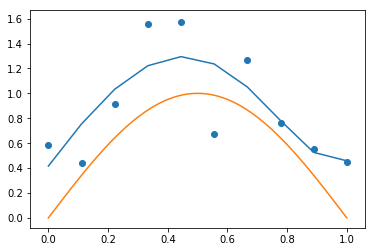

In [131]:
myF = np.poly1d(myTheta.tolist()[0][::-1])
plt.plot(x_pts,myF(x_pts))
plt.scatter(x_pts,y_pts)
x=np.linspace(0,1,100)
y=np.sin(np.pi*x)
plt.plot(x,y)
plt.show()